* First Data Exploratory Project undertaken by me
* Data file obtained from Great Learning as a part of their Data Science Projects course (Link: https://olympus.mygreatlearning.com/courses/43757)
* Date file name: battles.csv
* Data description:  This data file contains a record of every battle fought in the imaginary universe of G.R.R.Martin's Game of Thrones. The columns provide important information about which side is the attacker, which side is the defender, the size of their armies etc.
* Some important questions that will be answered over the course of this project:
   1. How many battles were fought over the entire series?
   2. Which king instigated battle maximum number of times?
   3. Which clans (Lannister, Stark, Baratheon etc.) had the most and least number of victories? Does this correlate with their army sizes?
   4. Among all battles, which battles had more than one attacker and just a single defender? Who won in such cases?

**Step 1:** Importing pandas and numpy packages

In [5]:
import pandas as pd
import numpy as np

**Step 2:** Reading the data file (battles.csv) and printing the first 5 rows.

In [6]:
battles=pd.read_csv("got/battles.csv", index_col=0)
battles.head()

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


**Step 3:** We can query and get some important tabular data like number of rows, number of columns, all column names and row names

In [13]:
row_col= battles.shape
print("Number of rows is " +str(row_col[0]) +" and number of columns is "+str(row_col[1]))

Number of rows is 38 and number of columns is 24


In [17]:
col_name=battles.columns
print(list(col_name))

['year', 'battle_number', 'attacker_king', 'defender_king', 'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2', 'defender_3', 'defender_4', 'attacker_outcome', 'battle_type', 'major_death', 'major_capture', 'attacker_size', 'defender_size', 'attacker_commander', 'defender_commander', 'summer', 'location', 'region', 'note']


Printing the column names as a vertical list makes it easier to read.

In [18]:
for col_name in battles.columns: 
    print(col_name)

year
battle_number
attacker_king
defender_king
attacker_1
attacker_2
attacker_3
attacker_4
defender_1
defender_2
defender_3
defender_4
attacker_outcome
battle_type
major_death
major_capture
attacker_size
defender_size
attacker_commander
defender_commander
summer
location
region
note


In [8]:
battles.rename(columns={'attacker_king':'primary_attacker','defender_king':'primary_Defender'}, inplace=True)
battles.head(38)

,year,battle_number,primary_attacker,primary_Defender,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN


Now, we can answer the first question posed at the beginning. The total number of battles fought over the entire series are 38 and their names are given as:

In [22]:
for row_name in battles.index:
    print(row_name)

Battle of the Golden Tooth
Battle at the Mummer's Ford
Battle of Riverrun
Battle of the Green Fork
Battle of the Whispering Wood
Battle of the Camps
Sack of Darry
Battle of Moat Cailin
Battle of Deepwood Motte
Battle of the Stony Shore
Battle of Torrhen's Square
Battle of Winterfell
Sack of Torrhen's Square
Sack of Winterfell
Battle of Oxcross
Siege of Storm's End
Battle of the Fords
Sack of Harrenhal
Battle of the Crag
Battle of the Blackwater
Siege of Darry
Battle of Duskendale
Battle of the Burning Septry
Battle of the Ruby Ford
Retaking of Harrenhal
The Red Wedding
Siege of Seagard
Battle of Castle Black
Fall of Moat Cailin
Sack of Saltpans
Retaking of Deepwood Motte
Battle of the Shield Islands
Invasion of Ryamsport, Vinetown, and Starfish Harbor
Second Seige of Storm's End
Siege of Dragonstone
Siege of Riverrun
Siege of Raventree
Siege of Winterfell


We can also find out data a specific location, let's say 5th row and 3rd column. Here, iloc has been used

In [101]:
battles.iloc[5,3]

'Joffrey/Tommen Baratheon'

Next, we can see which king initiated battle maximum number of times.

In [26]:
battles['primary_attacker'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: primary_attacker, dtype: int64

We can also pose a more specific query. For instance, how many times did Stannis Baratheon initiate battle?

In [33]:
battles['primary_attacker'].value_counts()['Stannis Baratheon']

5

Another query we can ask is: how many battles were fought in Riverrun?

In [34]:
battles['location'].value_counts()['Riverrun']

3

How many battles fought at Riverrun were initiated by Joffrey Baratheon?

In [85]:
col1=battles['primary_attacker'].tolist()
col2=battles['location'].tolist()
counter=0

for i in range(len(col1)):
     if col1[i]=='Joffrey/Tommen Baratheon' and col2[i]=='Riverrun':
         
        counter+=1
        
print(counter)




2


Alternate way of doing this very simply using iloc.

In [109]:
n1=battles.columns.get_loc('primary_attacker')
n1

2

In [110]:
n2=battles.columns.get_loc('location')
n2

21

In [116]:
counter=0
for i in range(len(battles)):
    if battles.iloc[i,2]=='Joffrey/Tommen Baratheon' and battles.iloc[i,21]=='Riverrun':
        counter+=1
        
print(counter)

2


In which battle was there maximum number of attackers?


In [124]:
battles['attacker_size'].idxmax()

'Battle of Castle Black'

Which location(s) had maximum number of battles?

In [128]:
battles['location'].value_counts()

Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore                       

What battle types were most common?

In [131]:
battles['battle_type'].value_counts()

pitched battle    14
siege             11
ambush            10
razing             2
Name: battle_type, dtype: int64

List the names of all battles that were pitched ones

In [145]:
n1=battles.columns.get_loc('battle_type')
n1

13

In [148]:
counter=0
for i in range(len(battles)):
    if battles.iloc[i,13]=='pitched battle':
       print(battles.index[i])
    counter+=1


Battle of the Golden Tooth
Battle of Riverrun
Battle of the Green Fork
Sack of Darry
Battle of Moat Cailin
Battle of Torrhen's Square
Battle of the Fords
Battle of the Blackwater
Battle of Duskendale
Battle of the Burning Septry
Battle of the Ruby Ford
Retaking of Harrenhal
Retaking of Deepwood Motte
Battle of the Shield Islands


In [151]:
pd.set_option('display.max_columns',30)
battles

,year,battle_number,primary_attacker,primary_Defender,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN


How many battles were won where there was only one attacker (the primary one)? Also, print the primary attacker's name and the battle name.

In [155]:
n1=battles.columns.get_loc('attacker_outcome')
n1

12

In [172]:
n2=battles.columns.get_loc('attacker_2')
n2

5

In [192]:
counter=0
for i in range(len(battles)):
     if pd.isnull(battles.iloc[i,5]) and pd.isnull(battles.iloc[i,6]) and pd.isnull(battles.iloc[i,7]) and battles.iloc[i,12]=='win':
        print(battles.iloc[i,battles.columns.get_loc('primary_attacker')])
        counter+=1
print(counter)
          

Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Robb Stark
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Stannis Baratheon
Robb Stark
Robb Stark
Robb Stark
nan
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Robb Stark
Joffrey/Tommen Baratheon
nan
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
24


How many battles were won by the attackers?

In [196]:
battles['attacker_outcome'].value_counts()['win']

32

In [33]:
import seaborn as sns; sns.set(font_scale=1.2)
from matplotlib import pyplot as plt

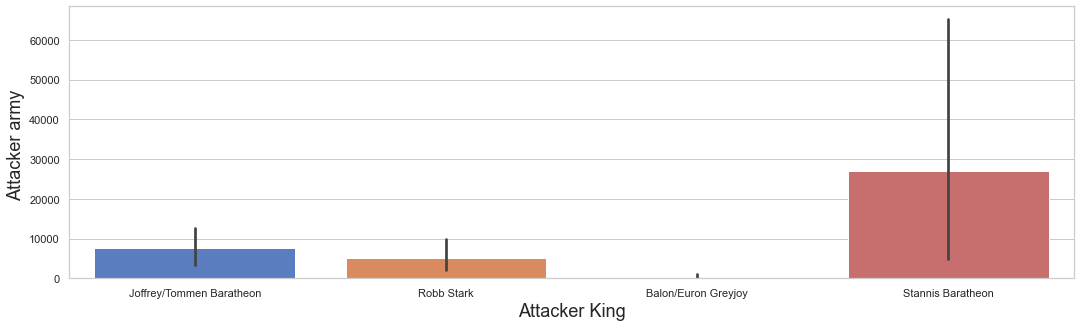

In [22]:
sns.set_theme(style="whitegrid", palette="muted",rc={'figure.figsize':(18,5)})
sns.barplot(x='primary_attacker', y='attacker_size', data=battles)
plt.xlabel('Attacker King',loc='center',fontsize=18)
plt.ylabel('Attacker army ',loc='center',fontsize=18)
plt.show()

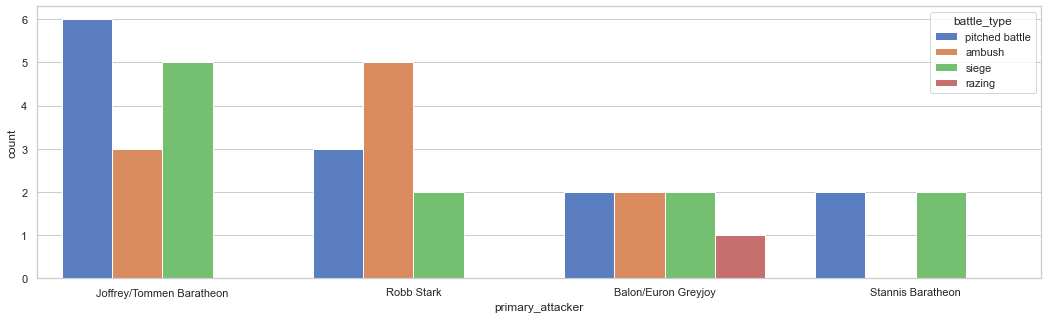

In [20]:
sns.countplot(x=battles['primary_attacker'], hue=battles['battle_type'])
plt.show()

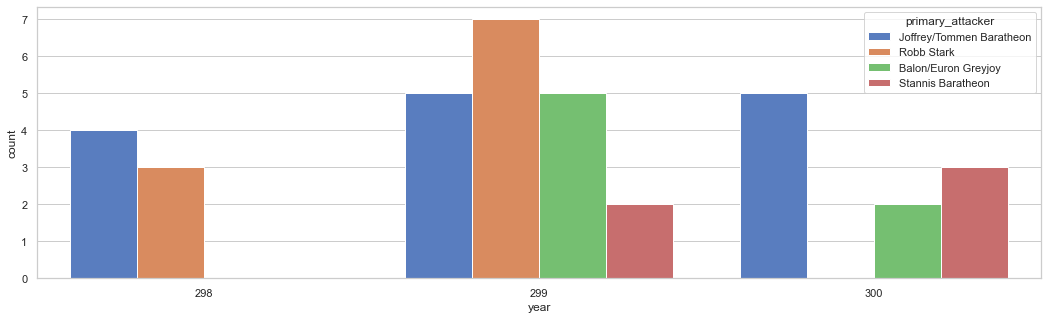

In [25]:
sns.countplot(x=battles['year'], hue=battles['primary_attacker'])
plt.show()

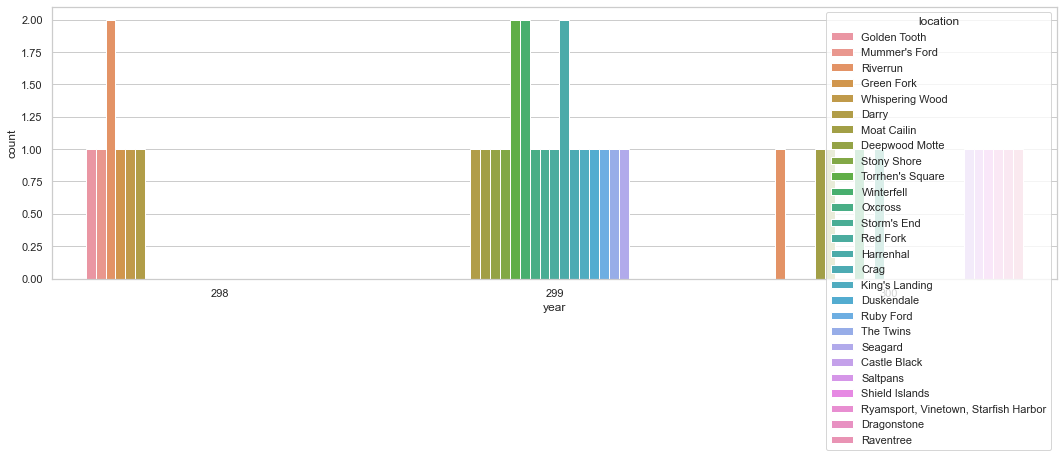

In [26]:
sns.countplot(x=battles['year'], hue=battles['location'])
plt.show()

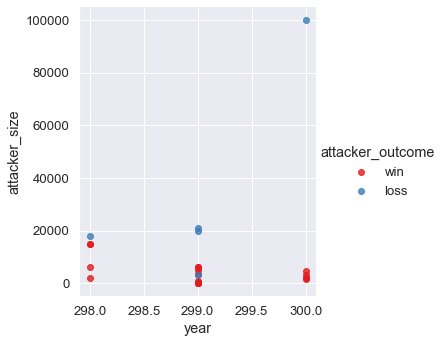

In [35]:
sns.lmplot(x='year',y='attacker_size', hue='attacker_outcome',data=battles, palette='Set1', fit_reg=False,scatter=True)
plt.show()

In [1]:
print('Hello world')

Hello world
